# Getting started with PyProBE

In [1]:
import pyprobe

## Convert data to standard format

Create the cell object and load some data. If this is the first time that the data has been loaded, it must first be converted into the standard format for PyProBE.

In [2]:
# Describe the cell. Required fields are 'Name'.
info_dictionary = {'Name': 'Sample cell',
                   'Chemistry': 'NMC622',
                   'Nominal Capacity [Ah]': 0.04,
                   'Cycler number': 1,
                   'Channel number': 1,}

# Create a cell object
cell = pyprobe.Cell(info=info_dictionary)

data_directory = '../../../tests/sample_data/neware'

# Uncomment if running locally
# cell.process_cycler_file(cycler='neware',
#                          folder_path=data_directory,
#                          input_filename='sample_data_neware.xlsx',
#                          output_filename='sample_data_neware.parquet')

If a parquet file exists alongside the original data file, you can add it as a Procedure object to the procedure dictionary of the cell. The key of the dictionary is the procedure name that you provide.

In [3]:
cell.add_procedure(procedure_name='Sample',
                   folder_path = data_directory,
                   filename = 'sample_data_neware.parquet')

print(cell.procedure)

{'Sample': Procedure(base_dataframe=<LazyFrame at 0x7F1CCE1AC810>, info={'Name': 'Sample cell', 'Chemistry': 'NMC622', 'Nominal Capacity [Ah]': 0.04, 'Cycler number': 1, 'Channel number': 1, 'color': '#ff00ff'}, column_definitions={'Date': 'The timestamp of the data point. Type: datetime.', 'Time [s]': 'The time passed from the start of the procedure.', 'Step': 'The step number.', 'Cycle': 'The cycle number.', 'Event': 'The event number. Counts the changes in cycles and steps.', 'Current [A]': 'The current through the cell.', 'Voltage [V]': 'The terminal voltage.', 'Capacity [Ah]': 'The net charge passed since the start of the procedure.', 'Temperature [C]': 'The temperature of the cell.', 'Procedure Time [s]': 'Time elapsed since beginning of procedure.', 'Procedure Capacity [Ah]': 'The net charge passed since beginning of procedure.'}, step_descriptions={'Step': [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], 'Description': ['Rest for 4 hours', 'Charge at 4mA until 4.2 V, Hold at 4.2 V until 0

The dashboard can be launched immediately (uncomment to run when outside docs environment):

In [4]:
# pyprobe.launch_dashboard([cell])

The raw data is accessible as a dataframe with the data property:

In [5]:
print(cell.procedure['Sample'].data)

shape: (789_589, 9)
┌────────────────┬────────────┬──────┬───────┬───┬─────────┬──────────┬────────────────┬───────────┐
│ Date           ┆ Time [s]   ┆ Step ┆ Event ┆ … ┆ Voltage ┆ Capacity ┆ Procedure Time ┆ Procedure │
│ ---            ┆ ---        ┆ ---  ┆ ---   ┆   ┆ [V]     ┆ [Ah]     ┆ [s]            ┆ Capacity  │
│ datetime[μs]   ┆ f64        ┆ i64  ┆ i64   ┆   ┆ ---     ┆ ---      ┆ ---            ┆ [Ah]      │
│                ┆            ┆      ┆       ┆   ┆ f64     ┆ f64      ┆ f64            ┆ ---       │
│                ┆            ┆      ┆       ┆   ┆         ┆          ┆                ┆ f64       │
╞════════════════╪════════════╪══════╪═══════╪═══╪═════════╪══════════╪════════════════╪═══════════╡
│ 2024-02-29     ┆ 0.0        ┆ 2    ┆ 0     ┆ … ┆ 3.7172  ┆ 0.04139  ┆ 0.0            ┆ 0.0       │
│ 09:20:29.094   ┆            ┆      ┆       ┆   ┆         ┆          ┆                ┆           │
│ 2024-02-29     ┆ 1.0        ┆ 2    ┆ 0     ┆ … ┆ 3.7197  ┆ 0.041391 ┆

Individual columns can be returned as 1D numpy arrays with the `get()` method:

In [6]:
current = cell.procedure['Sample'].experiment('Break-in Cycles').charge(0).get('Current [A]')
print(type(current), current)

<class 'numpy.ndarray'> [0.00399931 0.00400001 0.00400004 ... 0.00040614 0.0004023  0.0004    ]


Multiple columns can be returned at once:

In [7]:
current, voltage = cell.procedure['Sample'].experiment('Break-in Cycles').charge(0).get('Current [A]', 'Voltage [V]')
print("Current = ", current)
print("Voltage = ", voltage)

Current =  [0.00399931 0.00400001 0.00400004 ... 0.00040614 0.0004023  0.0004    ]
Voltage =  [3.2895 3.2962 3.2979 ... 4.2001 4.2001 4.2001]


And different unit can be returned on command:

In [8]:
current_mA = cell.procedure['Sample'].experiment('Break-in Cycles').charge(0).get('Current [mA]')
print("Current [mA] = ", current_mA)

Current [mA] =  [3.99931 4.00001 4.00004 ... 0.40614 0.4023  0.4    ]


Any part of the procedure can be plotted quickly using the ```add_line``` method:

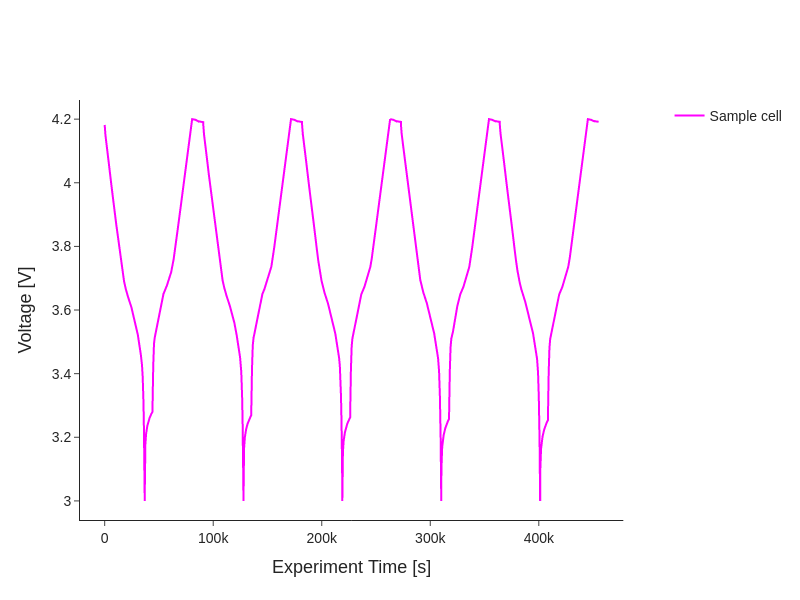

In [9]:
figure = pyprobe.Plot()
figure.add_line(cell.procedure['Sample'].experiment('Break-in Cycles'), 'Experiment Time [s]', 'Voltage [V]')
figure.show_image()
# figure.show() # This will show the plot interactively, it is commented out for the sake of the documentation


We can use the `analysis` to further analyse the data. For the `'Break-in Cycles'` we will use the `cycling` analysis module and the functions within. These functions return `Result` objects, so they can be interacted with in the same ways as raw data:

In [10]:
from pyprobe.analysis import cycling
cycling_summary = cycling.summary(input_data = cell.procedure['Sample'].experiment('Break-in Cycles'))
print(type(cycling_summary))

print(cycling_summary.data)

<class 'pyprobe.result.Result'>
shape: (5, 8)
┌───────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ Cycle ┆ Capacity   ┆ Time [s]   ┆ Charge     ┆ Discharge  ┆ SOH Charge ┆ SOH        ┆ Coulombic  │
│ ---   ┆ Throughput ┆ ---        ┆ Capacity   ┆ Capacity   ┆ [%]        ┆ Discharge  ┆ Efficiency │
│ i64   ┆ [Ah]       ┆ f64        ┆ [Ah]       ┆ [Ah]       ┆ ---        ┆ [%]        ┆ ---        │
│       ┆ ---        ┆            ┆ ---        ┆ ---        ┆ f64        ┆ ---        ┆ f64        │
│       ┆ f64        ┆            ┆ f64        ┆ f64        ┆            ┆ f64        ┆            │
╞═══════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ 0     ┆ 0.0        ┆ 28448.2    ┆ 0.041086   ┆ 0.040937   ┆ 100.0      ┆ 100.0      ┆ null       │
│ 1     ┆ 0.082022   ┆ 119273.495 ┆ 0.041247   ┆ 0.041138   ┆ 100.393179 ┆ 100.490732 ┆ 1.001267   │
│ 2     ┆ 0.164407   ┆ 210305.197 ┆ 0.04132  

And it can be plotted as normal too:

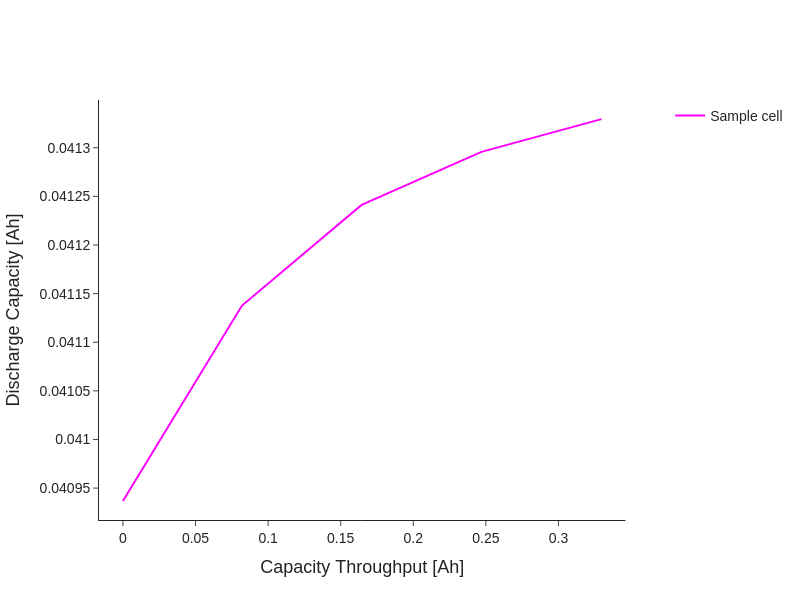

In [11]:
figure = pyprobe.Plot()
figure.add_line(cycling_summary, 
                x = 'Capacity Throughput [Ah]', 
                y = 'Discharge Capacity [Ah]')
figure.show_image()
# figure.show() # This will show the plot interactively, it is commented out for the sake of the documentation